# ME4429 Assignment 3 - Heat Transfer

Peter Murray, Jacob Abrogar, Erin Lee, Jose Rivera</br>
Professor Levey</br>
ME4429 Thermofluid Application and Design</br>
9/18/2022

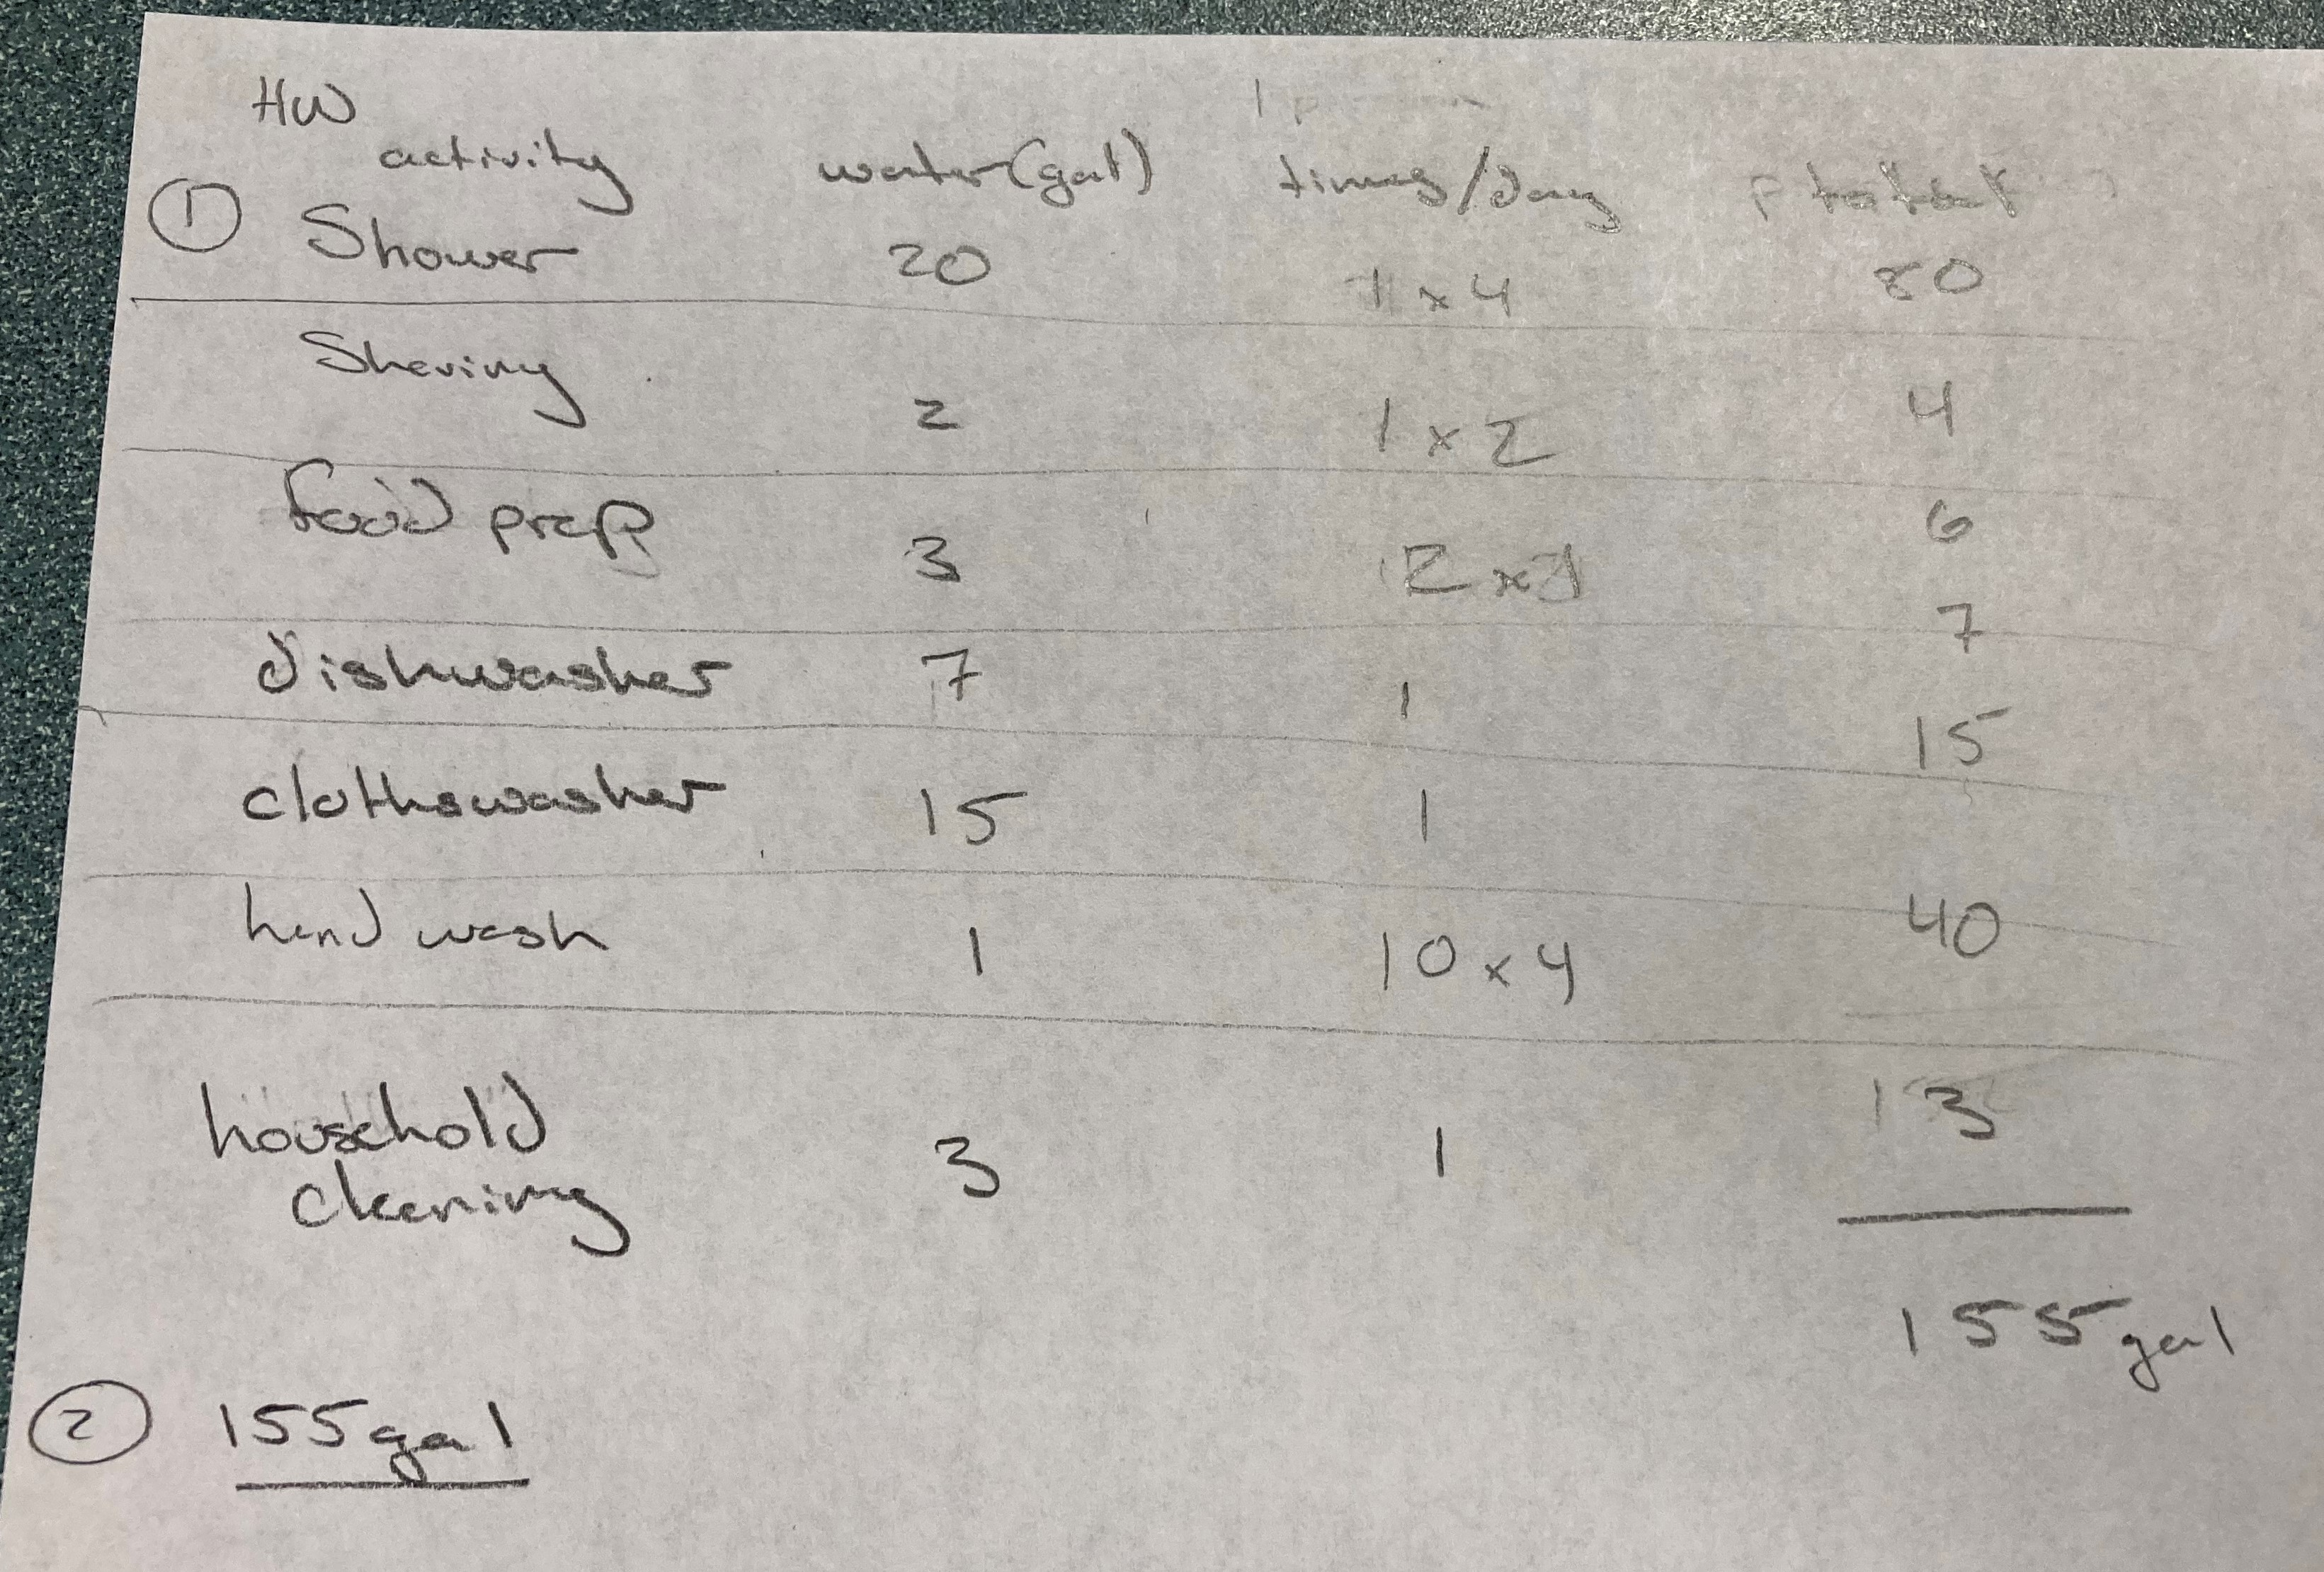

## Part 3
    Number of plates: 8
    Gap width: 7 mm
    Plate dimensions: 10x15 mm
    Plate material: Aluminum
    Pressing Pattern: 45 deg chevron
    Port Diameter: .23 mm
#### Flow rates:
    Water Volumetric flow rate: 4.07e-05 m3/s
    Water Mass flow rate:  0.0408 kg/s
    Glycol Volumetric flow rate: 0.000336 m3/s
    Glycol Mass flow rate: 0.000336 kg/s
#### Temperatures
    Water In: 8.3 C
    Water Out: 60 C
    Glycol In: 70 C
    Glycol Out: 63 C
#### Pressure Drops:
    Channel deltaP:  110263 pa (Water)  110594 pa (Glycol)
    Port deltaP:  4.119 pa (Water) 4.119 pa (Glycol)

In [46]:
# start with water
waterusage = 155 # gal/day (hot water)

c_water = 4.182 # specific heat, kJ/kgC
rho_water = 997 # density, kg/m3

T_water_in = 8.3 # temp, c
T_water_out = 60 # temp, c

Q_water_galhr = waterusage/4 # gal/hr (volumetric flowrate)
Q_water_m3hr = Q_water_galhr * 0.00378541
Q_water_m3s = Q_water_m3hr / (60 * 60)
print(f'Volumetric flow rate: (water) {Q_water_m3s} m3/s')

mdot_water_kghr = Q_water_galhr * 3.79 # kg/hr
mdot_water = mdot_water_kghr / (60 * 60) # kg/s
print(f'Mass flow rate: (water) {mdot_water} kg/s')

Qdot_water_kW = mdot_water * c_water * (T_water_out - T_water_in)
Qdot_water = Qdot_water_kW / 1000
print(f'Heat: {Qdot_water} J')

Volumetric flow rate: (water) 4.0745732638888884e-05 m3/s
Mass flow rate: (water) 0.040795138888888895 kg/s
Heat: 0.008820292502083337 J


In [45]:
T_glycol_in = 70 # temp, C
T_glycol_out = 63 # temp, C (GUESS)
c_glycol = 3.747 # specific heat, kJ/kgC
rho_glycol = 1000 # density, kg/m3

meu_water = 0.000732 # dynamic viscosity @ 34.15C Pa*s
meu_glycol = 0.042 # dynamic viscosity Pa*s
meu_w_water = .000544 # dynamic viscosity Pa*s
meu_w_glycol = meu_w_water

K_water = .621 # conductivity, W/mK
K_glycol = 0.147 # conductivity, W/mK

Qdot_glycol_kW = Qdot_water

mdot_glycol = (Qdot_glycol_kW) / (c_glycol * (T_glycol_in - T_glycol_out)) 
Q_glycol = mdot_glycol * rho_glycol # volumetric flow rate, m3/s
print(f'Mass flow rate (glycol): {mdot_glycol} kg/s')
print(f'Volumetric flow rate (glycol): {mdot_glycol} m3/s')

Mass flow rate (glycol): 0.00033628016707016423 kg/s
Volumetric flow rate (glycol): 0.00033628016707016423 m3/s


In [47]:
import math as m
# assume U

U = 2 # kW/m2K

T_2 = abs(T_glycol_in - T_water_out)
T_1 = abs(T_glycol_out - T_water_in)
T_lm = abs(T_1 - T_2) / (m.log((T_1)/(T_2)))
print(f'Log mean temp: {T_lm} C ')

A = Qdot_water_kW / (U * T_lm)

print(f"A: {round(A,9)} m2")

Log mean temp: 26.305280115751426 C 
A: 0.167652511 m2


In [39]:
phi = 1.2 # Area correction factor (1.15-1.25)
b = 0.00014 # Gap width, m
Wp = .1 # Width of plate, m (GUESS)
L = .18 # height of plate, m (GUESS)

Ac = Wp * b # Channel area
Ap = phi * Wp * L # heat transfer area of the plate
Np = A / Ap # Number of plates
De = (2 * b) / phi

print(f'Np: {Np} (number of plates)')
Np = round(Np)
print(f'Number of plates required: {Np}')

V = Q_water_m3s / (Np * Ac)
print(f'V: {round(V,9)} m/s')
print(f'Effective diamter: {De} m')

Np: 7.76169030133109 (number of plates)
Number of plates required: 8
V: 0.363801184 m/s
Effective diamter: 0.00023333333333333333 m


In [37]:
# for water
Re_water = (rho_water * V * De) / meu_water
print(f'Reynolds number (water): {Re_water}')

# From chevron angles, choose 45deg
Ch = .3
n = .663

Pr_water = ((c_water*1000) * meu_water) / K_water
print(f'Prandtl number (water): {Pr_water}')

Nu_water = Ch * (Re_water)**n * Pr_water**(.4) * (meu_water / meu_w_water)**(0.17)
print(f'Nusselt number (water): {Nu_water}')

h_water = (Nu * K_water) / De 
print(f'Concection heat transfer coefficient (water): {h_water} W/m2K')

Reynolds number (water): 115.61787181515317
Prandtl number (water): 4.9295072463768115
Nusselt number (water): 13.929748812100133
Concection heat transfer coefficient (water): 205560.52435980958 W/m2K


In [33]:
# for glycol
Re_glycol = (rho_glycol * V * De) / meu_water
print(f'Reynolds number (glycol): {Re_glycol}')

# From chevron angles, choose 45deg
Ch = .3
n = .663

Pr_glycol = ((c_glycol*1000) * meu_glycol) / K_water
print(f'Prandtl number (glycol): {Pr_glycol}')

Nu_glycol = Ch * (Re_glycol)**n * Pr_glycol**(.3) * (meu_glycol / meu_w_glycol)**(0.17)
print(f'Nusselt number (glycol): {Nu_glycol}')

h_glycol = (Nu * K_water) / De 
print(f'Concection heat transfer coefficient (glycol): {h_glycol} W/m2K')

Reynolds number (glycol): 115.96576912252073
Prandtl number (glycol): 253.4202898550725
Nusselt number (glycol): 77.23691199778138
Concection heat transfer coefficient (glycol): 205560.52435980958 W/m2K


In [34]:
Tp = .007 # plate thickness, m
K_plate = 237 # Aluminum W/mK
Rf_water = 0.0001763 # Fouling Factor, m2K/W
Rf_glycol = 0.00035

U_calculated = 1 / ((1/h_glycol) + (Tp/K_plate) + (1/h_water) + Rf_water + Rf_glycol)

print(f'U: {U_calculated}')

U: 1701.6225375526067


In [18]:
# Pressure through the channels

m = 0.206 # for 45deg chevron table
Kp = 1.441 

#for water

f_water = (4 * Kp) / (Re_water**m)
print(f_water)

deltaP_water = f_water * (L/De) * ((rho_water * V**2) / 2)
print(deltaP_water)

2.166410880077357
110263.03124905739


In [19]:
#for glycol

f_glycol = (4 * Kp) / (Re_glycol**m)
print(f_glycol)

deltaP_glycol = f_water * (L/De) * ((rho_glycol * V**2) / 2)
print(deltaP_glycol)

2.1650704407260877
110594.81569614583


In [20]:
# pressure through the ports

Dp = .01 # port diameter, m

HE_length = Np * b * (Tp + 1)
print(HE_length)

# for water - Re_water is 115 -> laminar. Use laminar eq.

f_water_pp = 64 / Re_water

deltaP_water_pp = f_water_pp * (HE_length/Dp) * ((rho_water * V**2) / 2)
print(deltaP_water_pp)

0.0011278399999999997
4.11903873266857


In [21]:
# for glycol - Re_water is 115 -> laminar. Use laminar eq.

f_glycol_pp = 64 / Re_glycol

deltaP_glycol_pp = f_glycol_pp * (HE_length/Dp) * ((rho_water * V**2) / 2)
print(deltaP_water_pp)

4.11903873266857


## Part 4

In [49]:
# determine pumping power
# for water-

total_deltaP_water = deltaP_water + deltaP_water_pp

Wdot_pump = total_deltaP_water * Q_water_m3s

P_water = Wdot_pump/.75 # power, watts

print(f'Power required for water: {P_water} W')

Power required for water: 5.990554432637964 W


In [50]:
# for glycol-

total_deltaP_glycol = deltaP_glycol + deltaP_glycol_pp

Wdot_pump = total_deltaP_glycol * Q_water_m3s

P_glycol = Wdot_pump/.75 # power, watts

print(f'Power required for glycol: {P_glycol} W')

Power required for glycol: 6.008578828471371 W


#### Pumping power requried:
    Power required for water: 5.99 W
    Power required for glycol: 6.01 W